# Used Bike Price Analysis

A used bike company is expanding its market in various India cities to meet customer demand and make more profit. The aim of the analysis is to find more about the market position in those cities to help the company make informed decisions based on those findings.

Objectives Questions to answer:

    1.What is the average bike price for each owner category?
    2.What is the top 5 cities with highest average bike price?
    3.What is the top 5 cities with highest selling rate?
    4.What is the top 5 selling models?
    5.Which top 5 brand category sell the most?


 Importing modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Load data into python

In [3]:
#Read and store the csv file in a dataframe named bike_df
bike_df=pd.read_csv(r"C:\Users\PUSHPALATA MALI\Downloads\bikes.csv")

In [4]:
#Quick overview of dataset
bike_df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [5]:
#Check the type of features. 
bike_df.dtypes

model_name    object
model_year     int64
kms_driven    object
owner         object
location      object
mileage       object
power         object
price          int64
dtype: object

In [7]:


#Frequency of charactere variables
bike_df.describe(include=['object'])



,model_name,kms_driven,owner,location,mileage,power
count,7857,7857,7857,7838,7846,7826
unique,1724,1801,4,561,117,272
top,Royal Enfield Classic 350cc 2017,Mileage 65 Kmpl,first owner,delhi,\n\n 35 kmpl,19.80 bhp
freq,78,436,6817,1438,1071,922


In [8]:
#Checking if there are missing values in our dataset
bike_df.info()
bike_df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


model_name    False
model_year    False
kms_driven    False
owner         False
location       True
mileage        True
power          True
price         False
dtype: bool

In [9]:
#The dataset contains a total number of 32648 observations and 8 columns.
bike_df.shape

(7857, 8)

In [10]:
#Check for duplicate values
bike_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7852    False
7853    False
7854    False
7855    False
7856    False
Length: 7857, dtype: bool

In [11]:
#Remove duplicate values
bike_df.drop_duplicates()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500
...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000


# Analysis
1. What is the average bike price for each owner category?

In [12]:
#Average bike price by owner category
bike_df.groupby(['owner'])['price'].mean()

owner
first owner             108937.902303
fourth owner or more     61718.068493
second owner             98173.126050
third owner              75718.067164
Name: price, dtype: float64

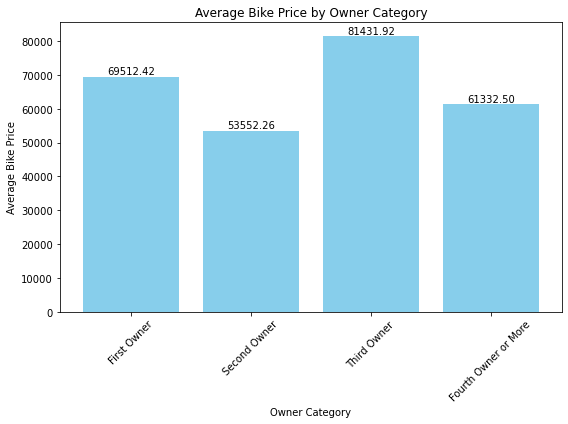

In [13]:
# Average bike prices for each owner category
owner_categories = ['First Owner', 'Second Owner', 'Third Owner', 'Fourth Owner or More']
average_prices = [69512.42, 53552.26, 81431.92, 61332.50]

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(owner_categories, average_prices, color='skyblue')

# Add labels and title
plt.xlabel('Owner Category')
plt.ylabel('Average Bike Price')
plt.title('Average Bike Price by Owner Category')

# Add annotations
for bar, price in zip(bars, average_prices):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{price:.2f}', 
             ha='center', va='bottom')

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

2. What is top 5 Cities with Highest Average Bike Price?

In [15]:
# Calculate average bike price by city
average_prices = bike_df.groupby(['location'])['price'].mean()

# Top 5 cities with highest average bike prices
top_5_cities = average_prices.nlargest(5)

print("Top 5 Cities with Highest Average Bike Prices")
print(top_5_cities)

Top 5 Cities with Highest Average Bike Prices
location
maradu     1200000.0
daman      1150000.0
dimapur     950000.0
raikot      780000.0
hardoi      700000.0
Name: price, dtype: float64


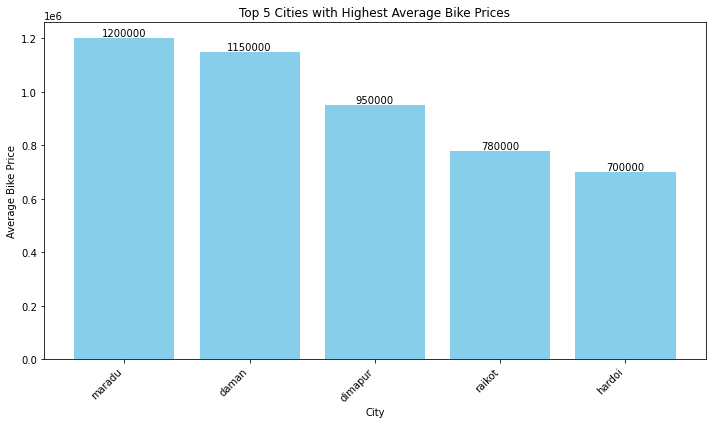

In [16]:
# Plot
    
# Create bar chart for top 5 cities
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_cities.index, top_5_cities.values, color='skyblue')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Average Bike Price')
plt.title('Top 5 Cities with Highest Average Bike Prices')

# Add average price on top of each bar without decimal
for bar, price in zip(bars, top_5_cities.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(price)}', ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

3. What is top 5 cities with highest selling rate?

In [17]:
# Calculate the percentage of bikes sold in each city
city_percentages = (bike_df['location'].value_counts(normalize=True) * 100)

# Top 5 cities with the highest percentages
top_5_cities = city_percentages.nlargest(5)

# Print the top 5 cities with their selling rates
print("Top 5 Cities with Highest Bike Selling Rate")
print(top_5_cities)

Top 5 Cities with Highest Bike Selling Rate
delhi        18.346517
mumbai       10.933912
bangalore     9.989793
pune          4.376116
hyderabad     4.299566
Name: location, dtype: float64


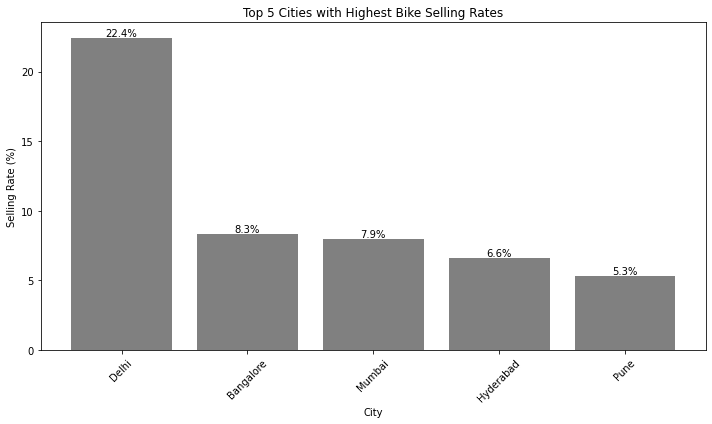

In [18]:
# Data for top 5 cities with their selling rates
cities = ['Delhi', 'Bangalore', 'Mumbai', 'Hyderabad', 'Pune']
selling_rates = [22.414849, 8.340480, 7.936168, 6.616025, 5.280568]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(cities, selling_rates, color='grey')  # Changing color to 'grey'

# Add percentages on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.1f%%' % height, ha='center', va='bottom')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Selling Rate (%)')
plt.title('Top 5 Cities with Highest Bike Selling Rates')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

4. What is the top 5 selling bike models?

In [20]:
# Top 5 selling bike models
top_5_bike_models = bike_df['model_name'].value_counts().head(5)

# Print the top 5 selling bike models
print("Top 5 Selling Bike Models")
print(top_5_bike_models)

Top 5 Selling Bike Models
Royal Enfield Classic 350cc 2017        78
Royal Enfield Classic 350cc 2016        69
Royal Enfield Classic 350cc 2015        68
Royal Enfield Thunderbird 350cc 2015    64
Royal Enfield Classic 350cc 2018        59
Name: model_name, dtype: int64


In [21]:
# Top 5 selling bike models
top_5_bike_models = bike_df['model_name'].value_counts().head(5)

# Create a list of tuples for the data
table_data = [(model, count) for model, count in zip(top_5_bike_models.index, top_5_bike_models.values)]

# Display the table
print("Top 5 Selling Bike Models")
print(tabulate(table_data, headers=['Bike Model', 'Number of Sales'], tablefmt='grid'))

Top 5 Selling Bike Models
+--------------------------------------+-------------------+
| Bike Model                           |   Number of Sales |
+======================================+===================+
| Royal Enfield Classic 350cc 2017     |                78 |
+--------------------------------------+-------------------+
| Royal Enfield Classic 350cc 2016     |                69 |
+--------------------------------------+-------------------+
| Royal Enfield Classic 350cc 2015     |                68 |
+--------------------------------------+-------------------+
| Royal Enfield Thunderbird 350cc 2015 |                64 |
+--------------------------------------+-------------------+
| Royal Enfield Classic 350cc 2018     |                59 |
+--------------------------------------+-------------------+


5. What's top 5 brand categories with highest sales

In [24]:
# Top 5 brand categories that sell the most
top_5_brand_categories = bike_df['model_name'].value_counts().head(5)

# Display the top 5 brand categories
print("Top 5 Brand Categories with highest sales")
print(top_5_brand_categories)

Top 5 Brand Categories with highest sales
Royal Enfield Classic 350cc 2017        78
Royal Enfield Classic 350cc 2016        69
Royal Enfield Classic 350cc 2015        68
Royal Enfield Thunderbird 350cc 2015    64
Royal Enfield Classic 350cc 2018        59
Name: model_name, dtype: int64


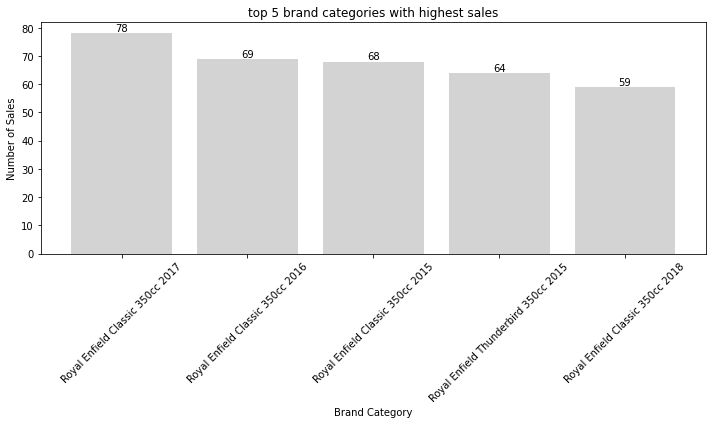

In [25]:
# Top 5 brand categories with highest sales
top_5_brand_categories = bike_df['model_name'].value_counts().head(5)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_brand_categories.index, top_5_brand_categories.values, color='lightgrey')

# Add labels and title
plt.xlabel('Brand Category')
plt.ylabel('Number of Sales')
plt.title('top 5 brand categories with highest sales')

# Add numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()